## 00 PyTorch Fundamentals - Day 1

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.3.0+cu121


## Intro to Tensors
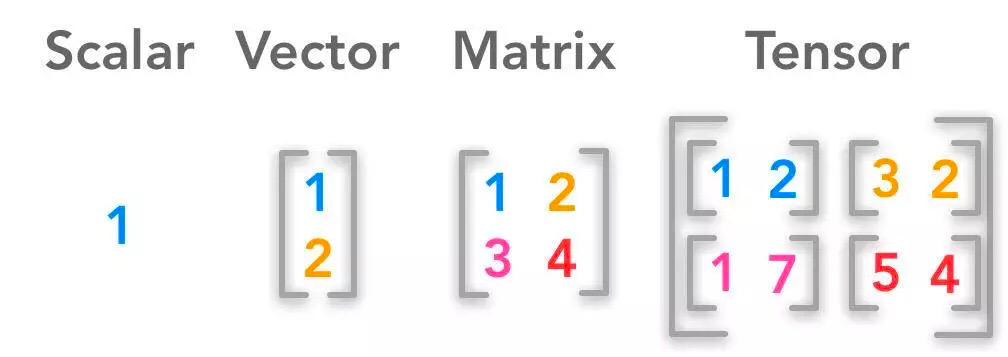
###Creating tensors

In [3]:
# scalar

scalar = torch.tensor(7)
scalar


tensor(7)

In [4]:
scalar.ndim

0

In [5]:
# Get tensor back as Python list
scalar.item()

7

In [6]:
# Vector - magnitude & direction
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [8]:
vector.ndim

1

In [9]:
# 2 x 1 elements
vector.shape

torch.Size([2])

In [11]:
#MATRIX
MATRIX = torch.tensor([[7,8],
                       [9,10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [12]:
MATRIX.ndim

2

In [13]:
MATRIX[1]

tensor([ 9, 10])

In [14]:
MATRIX.shape

torch.Size([2, 2])

In [16]:
# TENSOR
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5 ]]])
TENSOR

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])

In [17]:
TENSOR.ndim

3

In [18]:
TENSOR.shape

torch.Size([1, 3, 3])

In [19]:
TENSOR[0]

tensor([[1, 2, 3],
        [3, 6, 9],
        [2, 4, 5]])

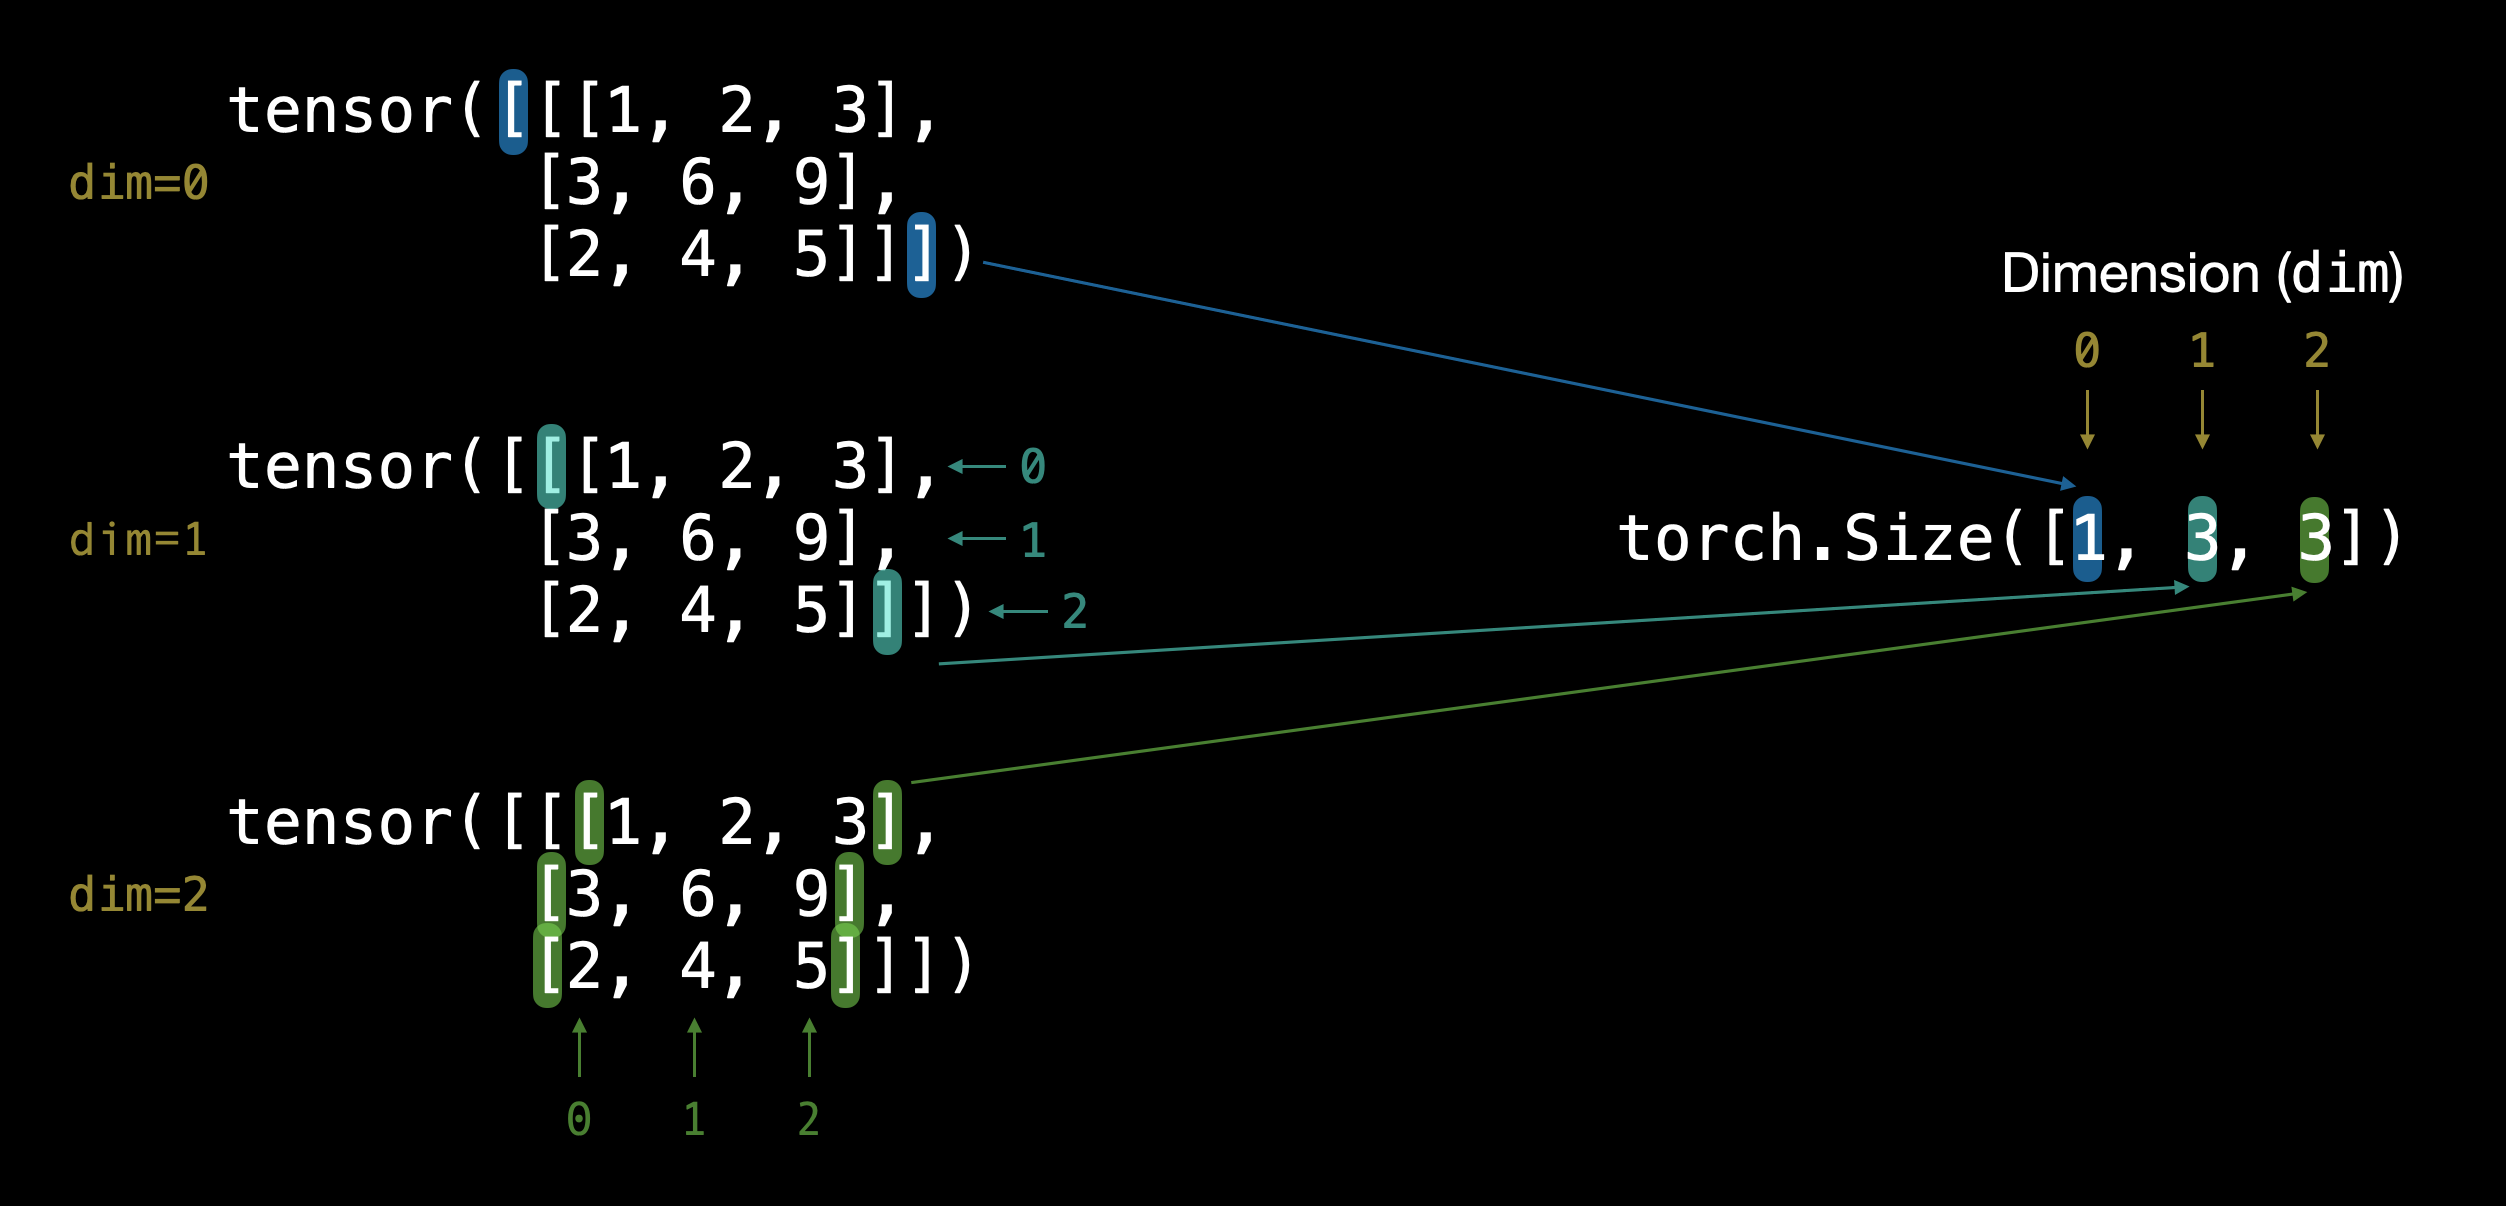

### Random Tensors

Why random tensors?

Random tensors are important because the way many neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data.

`
start with random number -> look at data -> update random numbers -> look at data -> update random numbers
`

In [25]:
# Create a random tensor of size ( 3, 4 )

random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.3411, 0.0651, 0.5237, 0.3819],
        [0.7420, 0.0139, 0.9239, 0.5420],
        [0.8145, 0.3236, 0.1573, 0.2881]])

In [26]:
random_tensor.ndim

2

In [27]:
# Create random tensor with a similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(244, 244, 3)) # height, width, color channels (R, G, B)
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([244, 244, 3]), 3)

### Zeros and ones

In [28]:
# Creating a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [30]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [31]:
ones.dtype

torch.float32

In [33]:
random_tensor.dtype

torch.float32

### Creating a range of tensors and tensors-like

In [42]:
# Use torch.range()
one_to_mil = torch.arange(start=0,end=1000,step=77)
one_to_ten = torch.arange(start=1,end=11,step=1)
uno_a_dez = torch.arange(1,11)
one_to_ten,uno_a_dez

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [43]:
# creating tensors like
ten_zeros = torch.zeros_like(input=one_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor Datatypes

**Notes:** Tensor datatypes is one of the 3 big errors you'll run into with PyTorch & deep learning:
1. Tensor not right datatype
2. Tensors not right shape
3. Tensors not on the right device


In [54]:
# Float 32 tensors
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, #what dataype is the tensor (e.g float16 float32)
                               device=None, #what device is ur tensor on
                               requires_grad=False) # whetheror not to track gradients with this tensor operations
float_32_tensor

tensor([3., 6., 9.])

In [55]:
float_32_tensor.dtype

torch.float32

In [56]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [58]:
float_16_tensor * float_32_tensor

tensor([ 9., 36., 81.])

In [63]:
int_32_tensor = torch.tensor([3,6,9],dtype=torch.long)
int_32_tensor

tensor([3, 6, 9])

In [64]:
float_32_tensor*int_32_tensor

tensor([ 9., 36., 81.])

### Getting Information from tensors (tensor attribues)

1. Tensor not right datatype - to get datatype from a tensor, can use `tensor.dtype`
2. Tensors not right shape - to get shape from a tensor, can use `tensor.shape`
3. Tensors not on the right device - to ge device from a tensor,can use `tensor.device`


In [66]:
# Create a tensor
some_tensor = torch.rand(3,4)
some_tensor

tensor([[0.7903, 0.6426, 0.5251, 0.4114],
        [0.9662, 0.3331, 0.8722, 0.5700],
        [0.8306, 0.8649, 0.0194, 0.9970]])

In [67]:
# Find out details about some tensor
print(some_tensor)
print(f'Datatype of tensor: {some_tensor.dtype}')
print(f'Shape of tensor: {some_tensor.shape}')
print(f'Device tensor is on: {some_tensor.device}')

tensor([[0.7903, 0.6426, 0.5251, 0.4114],
        [0.9662, 0.3331, 0.8722, 0.5700],
        [0.8306, 0.8649, 0.0194, 0.9970]])
Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device tensor is on: cpu


### Manipulating Tensors (tensor operations)

Tensor operations include:
* Addition
* Subtraction
* Multiplication (element-wise)
* Division
* Matrix multiplication

In [68]:
# Create a tensor and add 10 to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [69]:
# mulitply tensor by 10
tensor * 10

tensor([10, 20, 30])

In [70]:
tensor

tensor([1, 2, 3])

In [71]:
# subtract 10
tensor - 10

tensor([-9, -8, -7])

In [72]:
# try out pytorch inbuilt functions
torch.mul(tensor,10)

tensor([10, 20, 30])

In [73]:
torch.add(tensor,10)

tensor([11, 12, 13])

### Matrix Multiplication

Two main ways of performing multiplication in neural networks and deep learning:

1. Element-wise multiplication
2. Matrix multiplication (dot product)

There are two main rules that performing matrix multiplication needs to satisfy:
1. the **inner dimensions** must match
* `(3,2) @ (3,2)` won't work
* `(2,3) @ (3,2)` will work
* `(3,2) @ (2,3)` will work
2. The resulting matrix has the shape of the **outer dimensions**:
* `(2,3) @ (3,2)` -> `(2,2)`
* `(3,2) @ (2,3)` -> `(3,3)`

In [74]:
# Element wise multiplication

print(tensor,'*',tensor)
print(f'Equals: {tensor*tensor}')

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [75]:
# Matrix Multiplication
torch.matmul(tensor,tensor)

tensor(14)

In [76]:
# Matrix Multiplication by hand
1*1 + 2*2 + 3*3

14

In [77]:
%%time
value = 0
for i in range(len(tensor)):
  value+= tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 3.94 ms, sys: 40 µs, total: 3.98 ms
Wall time: 5.97 ms


In [78]:
%%time
torch.matmul(tensor,tensor)

CPU times: user 177 µs, sys: 0 ns, total: 177 µs
Wall time: 182 µs


tensor(14)

### One of the most common problems in deep learning is shape errors

In [79]:
# Shapes for matrix multiplication
tensor_A = torch.tensor([[1,2],
                        [3,4],
                        [5,6]])
tensor_B = torch.tensor([[7,10],
                         [8,11],
                         [9,12]])

torch.mm(tensor_A,tensor_B) # torch.mm is the same as torch.matmul(it's an alias)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [80]:
tensor_A.shape,tensor_B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

To fix this tensor shape issues, we can manipulate the shape of one of our tensors using a **transpose**.
A **transpose** switches the axes of dimensions of a given tensor.

In [83]:
tensor_B, tensor_B.shape

(tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]),
 torch.Size([3, 2]))

In [82]:
tensor_B.T, tensor_B.T.shape

(tensor([[ 7,  8,  9],
         [10, 11, 12]]),
 torch.Size([2, 3]))

In [86]:
# The matrix multiplication operations works when tensor_B is transposed
print(f'Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}')
print(f'New shapes: tensor_A = {tensor_A.shape}, tensor_B.T = {tensor_B.T.shape}')

print(f'multiplying: {tensor_A.shape} @ {tensor_B.T.shape} <- inner dimensions must match')
print('output: \n')
output = torch.mm(tensor_A,tensor_B.T)
print(output)
print(f"\n output of the shape is {output.shape}")


Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])
New shapes: tensor_A = torch.Size([3, 2]), tensor_B.T = torch.Size([2, 3])
multiplying: torch.Size([3, 2]) @ torch.Size([2, 3]) <- inner dimensions must match
output: 

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

 output of the shape is torch.Size([3, 3])


## Finding the min, max, mean, sum, etc (tensor aggregation)

In [100]:
# create a tensor
x = torch.arange(1,100,10)
x, x.dtype

(tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]), torch.int64)

In [101]:
torch.min(x), x.min()

(tensor(1), tensor(1))

In [102]:
torch.max(x),x.max()

(tensor(91), tensor(91))

In [103]:
#torch.mean and x.mean requires float datatype to work
torch.mean(x.type(torch.float32)),x.type(torch.float32).mean()

(tensor(46.), tensor(46.))

In [104]:
torch.sum(x), x.sum()

(tensor(460), tensor(460))

### Finding the positional min and max

In [105]:
x

tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])

In [106]:
#find the position in tensor that has the min value with argmin() -> returns the index position of the target where the min value occurs
x.argmin()

tensor(0)

In [107]:
x[0]

tensor(1)

In [108]:
# find the position in tensor that has the max calue with argmax()\
x.argmax()

tensor(9)

In [109]:
x[9]

tensor(91)

## reshaping, stacking, squeezing, and unsqueezing tensors

* reshaping - reshapes an input tensor to a defined shape
* View - return a view of an input tensor of certain shape but keep the same memory as the original tensor
* Stacking - combine multiple tensors ontop of each other (vstack) or side by side (hstack)
* squeeze - removes all `1` dimensions from a tensor
* Unsqueeze - add a `1` dimension to a target tensor
* Permute - return a view of the input with dimensions permuted (swapped) in a certain way


In [125]:
# creating a tensor
import torch

x = torch.arange(1.,10.)
x,x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [126]:
# add a extra dimension
x_reshape = x.reshape(1,9)
x_reshape,x_reshape.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [127]:
# change the view
z = x.view(1,9)
z,z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [128]:
#changing z changes x (bc a view of a tensor shares the same memory as the original input)

z[:,0] = 5
z,x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [134]:
# Stack tensors on top of each other
x_stacked = torch.stack([x,x,x,x],dim=0)
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [146]:
# torch.squeeze() - removes all single dim of a target
print(f'Previous tensor: {x_reshape}')
print(f'Previous shape: {x_reshape.shape}')

#remove extra dimensions from x_reshape
x_squeeze = x_reshape.squeeze()
print(f'Previous tensor: {x_squeeze}')
print(f'Previous shape: {x_squeeze.shape}')

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])
Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])


In [149]:
# torch.unsqueeze() - adds a single dimension to a target tensor at a specific dim
print(f'Previous target: {x_squeeze}')
print(f'Previous shape: {x_squeeze.shape}')

# add an extra dimension with unsqueeze
x_unsqueeze = x_squeeze.unsqueeze(dim=0)
print(f'New target: {x_unsqueeze}')
print(f'New shape: {x_unsqueeze.shape}')

Previous target: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])
New target: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
New shape: torch.Size([1, 9])


In [152]:
# torch.permute - rearranges the dimensions of a target in a specific order
x_original = torch.rand(size=(244,224,3)) # [height, width, color_channels]

# permute the originial tensor to reaarange the axis (or dim) order
x_permuted = x_original.permute(2,0,1) # shifts axis 0->1 , 1->2, 2->0

print(f'Previous shape: {x_original.shape}')
print(f'New shape: {x_permuted.shape}') # [color_channels,height,width]


Previous shape: torch.Size([244, 224, 3])
New shape: torch.Size([3, 244, 224])


In [155]:
x_original[1,1,1] = 123
x_original[1,1,1],x_permuted[1,1,1]

(tensor(123.), tensor(123.))

## Indexing (selecting data from tensors)

Indexing with Pytorch is similar to indexing with NumPy

In [158]:
# creating a tensor
import torch
x = torch.arange(1,10).reshape(1,3,3)
x,x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [159]:
#lets index on our new tensor
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [161]:
#indexing on the middle bracket (dim=1)
x[0][0]

(tensor([1, 2, 3]), tensor([1, 2, 3]))

In [174]:
#index on the most inner bracker (last dim)
x[0][-1][-1],x[:,:,-1]

(tensor(9), tensor([[3, 6, 9]]))

In [167]:
# you can also use ":" to select "all" of a target dim
x[:0]

tensor([], size=(0, 3, 3), dtype=torch.int64)

In [168]:
# get all values of 0th and let dimensions onyl index 1 of 2nd dim

x[:,:,1]

tensor([[2, 5, 8]])

In [170]:
# get all values of the 0 dimensions but only the 1 index value of 1st and 2nd dimensions

x[:,1,1]

tensor([5])

In [171]:
# get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0,0,:]

tensor([1, 2, 3])

## PyTorch tensors & Numpy

NumPy is a popular scientific Python numerical computing libary.

And because of this, PyTorch has functionality to interact with it.

* Data in Numpy, want in PyTorch tensor -> `torch.from_numpy(ndarray)`
*PyTorch tensor -> NumPy -> `torch.Tensor.numpy()`

In [193]:
# NumPy array to tensor
import torch
import numpy as np

array = np.arange(1.0,8.0)
tensor = torch.from_numpy(array)
array,tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [194]:
array.dtype #numpy default datatype, we would need to change it

dtype('float64')

In [195]:
tensor.dtype

torch.float64

In [196]:
torch.arange(1.0,8.0).dtype

torch.float32

In [197]:
# changing the value of array, what will this do to the "tensor"

array = array+1
array,tensor

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [198]:
# tensor to numpy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor,numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [199]:
#changing the tensor, what happens to `numpy_tensor`?

tensor = tensor +1
tensor,numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

## Reproducbility (trying to take random out of random)

In short how a neural network learns:

`start with random numbers -> tensor operations -> update random numbers to try and make them better representations of the data -> again -> again -> again...`

To reduce this randomness in neural networks and PyTorch comes the concept of a random seed.

Essentially what the random seed does is "flavor" the randomness.


In [210]:
random_tensor_A = torch.rand(3,4)
random_tensor_B = torch.rand(3,4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A==random_tensor_B)

tensor([[0.9855, 0.0848, 0.2095, 0.8643],
        [0.3115, 0.5100, 0.6955, 0.1521],
        [0.6037, 0.2994, 0.1482, 0.7301]])
tensor([[0.4990, 0.9260, 0.8164, 0.2116],
        [0.2615, 0.4885, 0.7723, 0.1154],
        [0.8921, 0.9586, 0.8596, 0.6441]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [214]:
# let's make some random but reproducible tensors

#set the random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3,4)
torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3,4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C==random_tensor_D)


tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Running tensors and Pytorch objects on GPUs (and making faster computations)

GPUs = faster computations on numbers, thanks to CUDE + NVIDIA hardware + PyTorch working behind the scenes to make everything good

In [2]:
!nvidia-smi

Thu Jun 20 02:40:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Check for GPU access with PyTorch

In [3]:
# check fo GPU access with PyTorch

import torch
torch.cuda.is_available()

True

In [4]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [5]:
# count number of devices
torch.cuda.device_count()

1

## Putting tensors and models on the GPU

The reason we want our tensors/models on the GPU is because using a GPU results in faster computation

In [6]:
# creating a tensor (defaut on the CPU)

tensor = torch.tensor([1,2,3])

#tensor not on gpu
print(tensor,tensor.device)

tensor([1, 2, 3]) cpu


In [7]:
#move tensor to gpu if available
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

### moving tensors back to cpu

In [10]:
#if tensor is on GPU, we can't transform it to NumPy

tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [11]:
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')